# ONE HOT ENCODING AND LABEL ENCODING

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('covid_de.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(df.shape)
df.head(10)

(89090, 8)


,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-04-05,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-05-18,1,0,1
5,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-17,1,0,1
6,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-25,1,0,1
7,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-26,1,0,1
8,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-29,1,0,1
9,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-31,1,0,1


In [3]:
df.isnull().sum()

state          0
county         0
age_group    110
gender       260
date           0
cases          0
deaths         0
recovered      0
dtype: int64

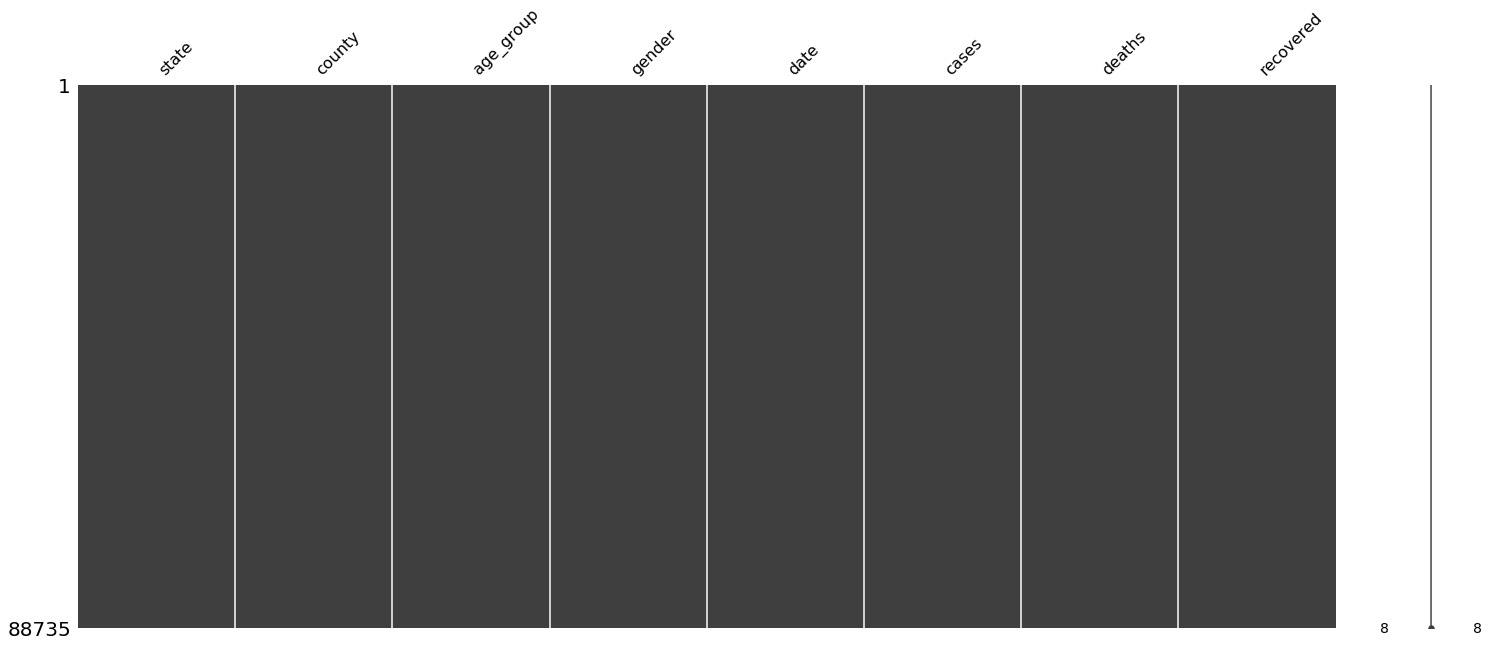

In [4]:
#cheak the missing values in data frame
df=df.dropna()
msno.matrix(df)

In [5]:
df.isnull().sum()

state        0
county       0
age_group    0
gender       0
date         0
cases        0
deaths       0
recovered    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88735 entries, 0 to 89089
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      88735 non-null  object
 1   county     88735 non-null  object
 2   age_group  88735 non-null  object
 3   gender     88735 non-null  object
 4   date       88735 non-null  object
 5   cases      88735 non-null  int64 
 6   deaths     88735 non-null  int64 
 7   recovered  88735 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


In [7]:
df['state'].value_counts()

Bayern                    21141
Nordrhein-Westfalen       17979
Baden-Wuerttemberg        13680
Niedersachsen              7067
Hessen                     5978
Rheinland-Pfalz            4540
Berlin                     4394
Sachsen                    2860
Thueringen                 2327
Brandenburg                2125
Schleswig-Holstein         1985
Sachsen-Anhalt             1320
Saarland                   1276
Hamburg                     735
Bremen                      713
Mecklenburg-Vorpommern      615
Name: state, dtype: int64

In [8]:
#dummy variables(apply this method only in state column)
dummy=pd.get_dummies(df['state'])
dummy.head(10)

,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
dummy.keys()

Index(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'],
      dtype='object')

In [10]:
#Apply one hot encoder in state column
O_H_Encoder=OneHotEncoder(sparse=False ,dtype='int64')
encoded_data=O_H_Encoder.fit_transform(df[['state']])
encoded_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [11]:
#create a data frame of one hot encoder output
df_2=pd.DataFrame(encoded_data, columns=['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'])
df_2.head(10)

,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#apply label encoder in gender column
lab_enc=LabelEncoder()
df.iloc[: , 3] = lab_enc.fit_transform(df.iloc[: , 3])

In [13]:
df_3=df[['age_group','gender','date','cases','deaths','recovered']]

In [14]:
#combine data frames
comb_df = pd.concat([df_3, dummy], axis=1)
comb_df.head(10)

,age_group,gender,date,cases,deaths,recovered,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen
0,00-04,0,2020-03-27,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00-04,0,2020-03-28,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00-04,0,2020-04-03,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00-04,1,2020-04-05,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00-04,1,2020-05-18,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,05-14,0,2020-03-17,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,05-14,0,2020-03-25,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,05-14,0,2020-03-26,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,05-14,0,2020-03-29,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,05-14,0,2020-03-31,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
comb_df.tail(10)

,age_group,gender,date,cases,deaths,recovered,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen
89080,60-79,0,2020-04-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89081,60-79,1,2020-04-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89082,60-79,1,2020-04-02,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89083,60-79,1,2020-04-03,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89084,60-79,1,2020-04-06,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89085,60-79,1,2020-04-09,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89086,80-99,0,2020-03-28,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89087,80-99,0,2020-04-21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89088,80-99,1,2020-03-24,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89089,80-99,1,2020-04-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
